## Obtain

In [3]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/theleadio/datascience_demo/master/vgsales.csv")

## Scrub

In [4]:
# check any null
df.describe()


# all 'count' rows has the same value, hence nothing to drop

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## Explore

In [7]:
# list unique values in a column

platforms = df['Platform'].unique()
platforms

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [6]:
# inspect dataset

print(df.head(3))
print(df.tail(3))
print(df.sample(3))

   Rank               Name Platform    Year     Genre Publisher  NA_Sales  \
0     1         Wii Sports      Wii  2006.0    Sports  Nintendo     41.49   
1     2  Super Mario Bros.      NES  1985.0  Platform  Nintendo     29.08   
2     3     Mario Kart Wii      Wii  2008.0    Racing  Nintendo     15.85   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     29.02      3.77         8.46         82.74  
1      3.58      6.81         0.77         40.24  
2     12.88      3.79         3.31         35.82  
        Rank                                              Name Platform  \
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year     Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
16595  2008.0    Racing  Activision      0.00      0.00       0.0   
16596  2010.0    Puzzle    7G//AMES      0.00   

In [8]:
# filtering data, get platform at Wii only
df[df['Platform'] == 'Wii'].sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2180,2182,Cars 2,Wii,2011.0,Racing,Disney Interactive Studios,0.46,0.39,0.00,0.10,0.95
4083,4085,Dead Space Extraction,Wii,2009.0,Shooter,Electronic Arts,0.33,0.11,0.01,0.04,0.48
15021,15024,Penguins of Madagascar,Wii,2014.0,Action,Namco Bandai Games,0.00,0.02,0.00,0.00,0.02
2187,2189,Guitar Hero: Metallica,Wii,2009.0,Misc,Activision,0.41,0.43,0.00,0.10,0.95
5974,5976,MLB Power Pros,Wii,2007.0,Sports,Konami Digital Entertainment,0.23,0.00,0.04,0.02,0.29


In [9]:
# filtering data, get platform at Wii & sales > 30
df[(df['Platform'] == 'Wii') & (df['Global_Sales'] > 30)]  # Take note of the parentheses


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00


In [10]:
# groupby sum
df.groupby('Platform').sum()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,,,
2600,585665,229928.0,90.60,5.47,0.00,0.91,97.08
3DO,43118,5984.0,0.00,0.00,0.10,0.00,0.10
3DS,4662644,1006531.0,78.87,58.52,97.35,12.63,247.46
DC,456114,103997.0,5.43,1.69,8.56,0.27,15.97
DS,20845831,4283493.0,390.71,194.65,175.57,60.53,822.49
GB,332419,193608.0,114.32,47.82,85.12,8.20,255.45
GBA,7136749,1624604.0,187.54,75.25,47.33,7.73,318.50
GC,4817401,1085843.0,133.46,38.71,21.58,5.18,199.36
GEN,190019,53812.0,19.27,5.52,2.67,0.89,28.36


In [13]:
# settings to show all data
pd.set_option('display.max_rows', None)

# groupby mean
df.groupby('Publisher').mean()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,,,
10TACLE Studios,14064.000000,2006.666667,0.023333,0.013333,0.000000,0.000000,0.036667
1C Company,14412.333333,2010.333333,0.003333,0.023333,0.000000,0.006667,0.033333
20th Century Fox Video Games,5453.200000,1981.400000,0.364000,0.020000,0.000000,0.002000,0.388000
2D Boy,14013.000000,2008.000000,0.000000,0.030000,0.000000,0.010000,0.040000
3DO,8037.333333,2000.500000,0.180000,0.084444,0.000000,0.017500,0.281111
49Games,13579.000000,2009.000000,0.000000,0.040000,0.000000,0.000000,0.040000
505 Games,9725.234375,2008.817708,0.165781,0.085573,0.010677,0.028333,0.291198
5pb,15028.032787,2011.754098,0.000328,0.000000,0.026393,0.000000,0.026721
7G//AMES,15649.750000,2010.750000,0.000000,0.015000,0.000000,0.000000,0.020000


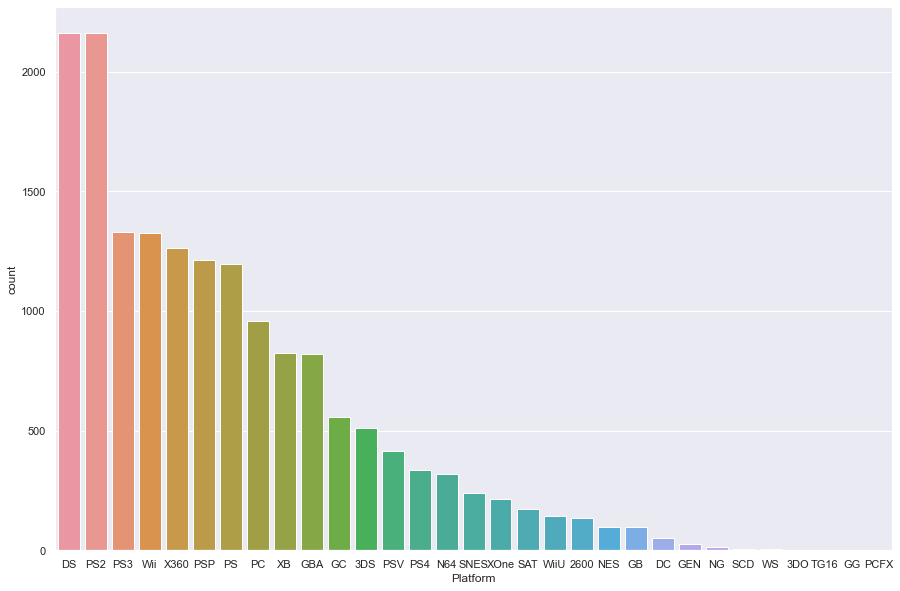

In [15]:
# Draw chart

sns.set(rc = {'figure.figsize' : (15, 10)})
ax = sns.countplot(x = "Platform", data = df, order = df['Platform'].value_counts().index)